In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2
import ChessUtility as cu

In [3]:
games = pd.read_csv('games_new_vars.csv')

## Models 

Recall we are trying to predict probabilities of winning. In particular, we are trying to find out the probability of a higher rated player winning a match. We predict these probabilities using the absolute value difference in rating between two players, the number of turns, and whether the higher rated player is white. At the outset, we will limit our models to binary classification (win or loss of higher rated player). Then, we will classify for result (win, loss, or draw). 

We will fit a logistic regression (only in the binary classification case), a bag of trees, a random forest, and perform linear discriminant analysis (when we classify wins, losses and draws). For each model, we will perform a stratified k-fold cross validation with ten fold splits to determine performance. Prediction accuracy as well as a confusion matrix for each model will help us determine which model performs best. 

## Normalization and response variable

Before fitting models, we will normalize our data. This is important since we intend on using multiple predictors, and our predictors could be on different scales. 

In [4]:
from sklearn.preprocessing import normalize

In [5]:
X = normalize(games[['abs_diff_rating', 'turns', 'white_higher_rated']])

Here we set up our response variable for a binary classification case. 

In [33]:
y = games['higher_rating_won']

Some of the algorithms below automatically randomize. By setting a random state, we will pick a random result and stick with it through out the analysis. 

In [34]:
RANDOM_STATE = 1

## Logistic Regression

We will begin with a Logistic Regression and perform a stratifed 10 fold cross validation on the model. 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
NUMBER_FOLDS = 10

In [37]:
lg = LogisticRegression()

In [38]:
lg_confusion_matrix = cu.run_stratified_k(lg, NUMBER_FOLDS, X, y, random_state = RANDOM_STATE)

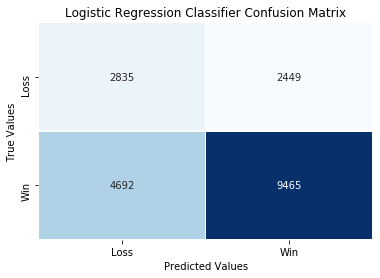

In [40]:
cu.create_cm_plot('Logistic Regression Classifier Confusion Matrix', lg_confusion_matrix)

In [41]:
lg_results = cu.get_cm_results(lg_confusion_matrix)

In [42]:
lg_results

{'accuracy': 0.6326835039349827,
 'fmeasure': 0.7260941275746999,
 'negative_pv': 0.37664408130729377,
 'precision': 0.7944435118348162,
 'recall': 0.6685738503920322,
 'specificity': 0.5365253595760787}

## Bag of Trees

We continue hunting for good models with a bag of trees. Here, we also run stratified 10 fold cross validation.  

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier 

In [44]:
tree = DecisionTreeClassifier()

In [45]:
NUMBER_ESTIMATORS = 100

In [46]:
bag = BaggingClassifier(base_estimator = tree, 
                        n_estimators = NUMBER_ESTIMATORS, 
                       random_state = RANDOM_STATE)

In [47]:
bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [48]:
bag_confusion_matrix = cu.run_stratified_k(bag, NUMBER_FOLDS, X, y, RANDOM_STATE)

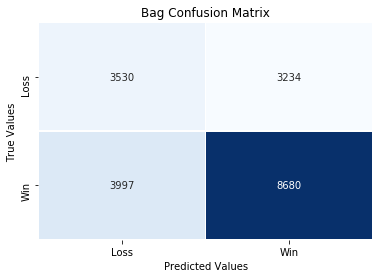

In [55]:
cu.create_cm_plot('Bag Confusion Matrix', bag_confusion_matrix)

In [56]:
bag_results = cu.get_cm_results(bag_confusion_matrix)

In [57]:
bag_results

{'accuracy': 0.6280541124427755,
 'fmeasure': 0.7059493310560775,
 'negative_pv': 0.468978344626013,
 'precision': 0.7285546415981199,
 'recall': 0.6847045831032579,
 'specificity': 0.5218805440567711}

## Random Forest
Next, we fit a random forest model. 

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
random_forest = RandomForestClassifier(n_estimators = NUMBER_ESTIMATORS, random_state = RANDOM_STATE)

In [60]:
rforest_confusion_matrix = cu.run_stratified_k(random_forest, NUMBER_FOLDS, X, y, RANDOM_STATE)

In [61]:
rforest_confusion_matrix

array([[3509, 3209],
       [4018, 8705]])

## Beyond binary 
In this section, we refit all models except for our logistic regression. This time, our response will be 'result'. Recall this encoded whether games were a loss, draw, or win for the higher rated player. 

In [55]:
y = games['result']

## Bag of Trees

We continue hunting for good models with a bag of trees. Here, we also run stratified 10 fold cross validation.  

In [62]:
tree = DecisionTreeClassifier()

In [63]:
bag = BaggingClassifier(base_estimator = tree, 
                        n_estimators = NUMBER_ESTIMATORS, 
                       random_state = RANDOM_STATE)

In [64]:
bag_confusion_matrix = cu.run_stratified_k(bag, NUMBER_FOLDS, X, y, RANDOM_STATE)

In [65]:
bag_confusion_matrix

array([[2829,  294, 2803],
       [ 184,  123,  279],
       [3600,  497, 8832]])

## Random Forest
Next, we fit a random forest model. 

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
random_forest = RandomForestClassifier(n_estimators = NUMBER_ESTIMATORS, random_state = RANDOM_STATE)

In [68]:
rforest_confusion_matrix = cu.run_stratified_k(random_forest, NUMBER_FOLDS, X, y, RANDOM_STATE)

In [69]:
rforest_confusion_matrix

array([[2822,  294, 2804],
       [ 189,  124,  281],
       [3602,  496, 8829]])

## Linear Discriminant Analysis